In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

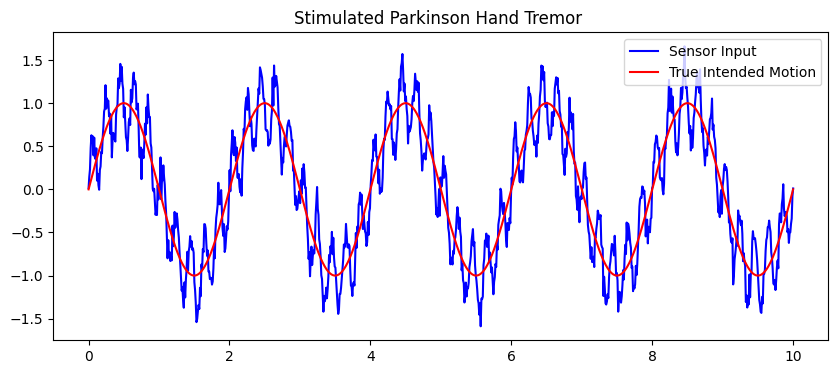

In [9]:
t = np.linspace(0, 10, 1000)
intended_motion = 1.0 * np.sin(2 * np.pi * 0.5 * t) #it is the sin equation 'asin(2*pi*freq*time)'
tremor_motion = 0.4* np.sin(2 * np.pi * 5 *t )
random_noise = 0.1 * np.random.normal(size=len(t)) #white noise
raw_signal = intended_motion + tremor_motion + random_noise

plt.figure(figsize=(10,4))
plt.plot( t, raw_signal, label = "Sensor Input", color= 'blue')
plt.plot ( t, intended_motion, label = "True Intended Motion", color = 'red')
plt.title ( "Stimulated Parkinson Hand Tremor ")
plt.legend()
plt.show()

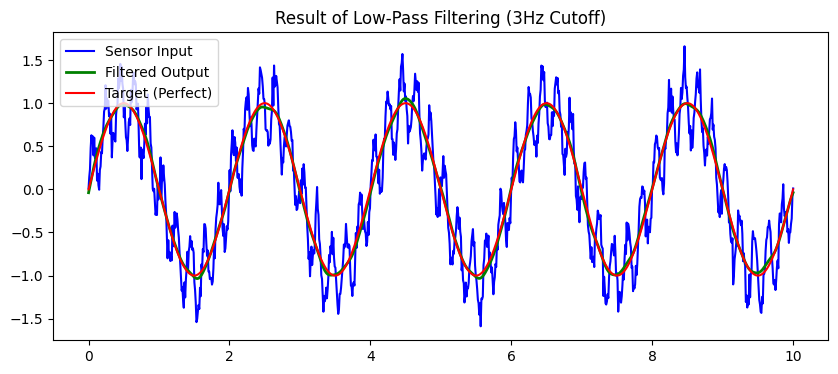

In [15]:
#The filter design
fs= 100 #sample rate
cutoff= 3.0
order = 4 #aggression of the filter

b , a = signal.butter( 4 , cutoff,fs=fs, btype='low', analog=False)
filtered_signal = signal.filtfilt(b,a,raw_signal) #zero-phase filter


plt.figure(figsize=(10, 4))
plt.plot(t, raw_signal, label='Sensor Input', color='blue')
plt.plot(t, filtered_signal, label='Filtered Output', color='green', linewidth=2)
plt.plot(t, intended_motion, label='Target (Perfect)', color='red', alpha=1)
plt.title("Result of Low-Pass Filtering (3Hz Cutoff)")
plt.legend()
plt.show()


In [16]:
# Calculate Error (RMSE - Root Mean Square Error)
original_error = np.sqrt(np.mean((raw_signal - intended_motion)**2))
filtered_error = np.sqrt(np.mean((filtered_signal - intended_motion)**2))

print(f"Original Tremor Error: {original_error:.3f}")
print(f"Post-Filter Error: {filtered_error:.3f}")
print(f"Tremor Reduction: {(original_error - filtered_error) / original_error * 100:.1f}%")

Original Tremor Error: 0.298
Post-Filter Error: 0.026
Tremor Reduction: 91.3%
